# **COST DRIVERS IN HEALTHCARE AND FACTORS AFFECTING OUTCOMES OF TREATMENT**

**PROBLEM STATEMENT**:
Healthcare facilities face rising treatment costs and inconsistent patient outcomes across various medical conditions and care settings. However, the specific cost drivers within treatment pathways and their direct impact on clinical outcomes remain unclear. This problem requires an analysis of how treatment decisions, resource use, and care settings influence both healthcare spending and patient health outcomes.

**OBJECTIVES**

1.   Analyze patient billing data
2.   Recommend measures to reduce cost
3.   Assess relationship between test results
      other variables
4.   Identify risk factors associated with  poor results


**RESEARCH QUESTIONS**


1.   Do medical conditions affect billing amount?
2.   Does healthcare facilty influence billing amount?

3.   Does type of admission affect billing amount?
4.   Which demographic group incur higher medical expense?


5.   What recommendations can be made to reduce treatment cost?
6.   Does medical condition, medication, age, length of hospital stay influence test
results?


7.   Are certain medical conditions more prone to poor test outcomes?







In [1]:
#load the toolkit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
print('Core toolkit loaded')

Core toolkit loaded


In [2]:
#load the data set and assign to a variable
df = pd.read_csv('medical_data.csv')
df

,Patient_ID,Name,Age,Medical_Condition,Date_of_Admission,Discharge_Date,Length_of_Stay,Doctor,Hospital,Insurance,Admission_Type,Medication,Test_Result_Category,Test_Result_Description,Billing_Amount,Patient_Responsibility
0,PAT117531,Kelly Martin,18,Asthma Attack,01-01-22 0:20,06-01-22 0:20,5,Dr. Underwood,Community Hospital,Blue Cross,Emergency,Prednisone,Normal,No acute findings,12545.94,1254.59
1,PAT120151,Mark Barrett,34,Migraine,01-01-22 5:01,02-01-22 5:01,1,Dr. Moore,General Hospital,UnitedHealthcare,Emergency,Sumatriptan,Normal,Vital signs stable,1922.77,192.28
2,PAT115503,David Johnson,54,Kidney Stones,01-01-22 5:06,04-01-22 5:06,3,Dr. Hunt,General Hospital,Medicaid,Emergency,Ketorolac,Critical,CRITICAL: Sepsis criteria met,38189.08,7637.82
3,PAT112375,David Sims,47,COVID-19,01-01-22 6:28,11-01-22 6:28,10,Dr. Hill,St. Mary's Hospital,Aetna,Emergency,Remdesivir,Abnormal,Slightly elevated blood glucose,65224.68,6522.47
4,PAT128055,Samantha Vazquez,52,Hypertension,01-01-22 6:46,06-01-22 6:46,5,Dr. Little,Memorial Medical Center,UnitedHealthcare,Elective,Lisinopril,Abnormal,Borderline high blood pressure,12436.37,1243.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17046,PAT109068,Sheila Thompson,52,Pneumonia,08-04-23 12:48,17-04-23 12:48,9,Dr. Hebert,Community Hospital,Medicare,Elective,Azithromycin,Critical,CRITICAL: ST elevation on EKG,49754.88,9950.98
17047,PAT102091,Dana Stevenson,45,Pneumonia,08-04-23 13:45,15-04-23 13:45,7,Dr. Tapia,General Hospital,Blue Cross,Urgent,Azithromycin,Critical,CRITICAL: Critical lab values,48847.56,4884.76
17048,PAT129928,Jacob Porter,43,Asthma Attack,08-04-23 13:50,11-04-23 13:50,3,Dr. Bailey,Community Hospital,Blue Cross,Emergency,Prednisone,Normal,All test results within normal range,6646.78,664.68
17049,PAT112537,Isabella Sims,29,Asthma Attack,08-04-23 13:51,12-04-23 13:51,4,Dr. Finley,Memorial Medical Center,UnitedHealthcare,Elective,Prednisone,Abnormal,Slightly elevated blood glucose,11495.23,1149.52


In [3]:
# summary of column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17051 entries, 0 to 17050
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               17051 non-null  object 
 1   Name                     17051 non-null  object 
 2   Age                      17051 non-null  int64  
 3   Medical_Condition        17051 non-null  object 
 4   Date_of_Admission        17051 non-null  object 
 5   Discharge_Date           17051 non-null  object 
 6   Length_of_Stay           17051 non-null  int64  
 7   Doctor                   17051 non-null  object 
 8   Hospital                 17051 non-null  object 
 9   Insurance                17051 non-null  object 
 10  Admission_Type           17051 non-null  object 
 11  Medication               17051 non-null  object 
 12  Test_Result_Category     17051 non-null  object 
 13  Test_Result_Description  17051 non-null  object 
 14  Billing_Amount        

Next Step:
1. Convert Date of admission and Discharge Date column to datetime data type
2. Check for duplicates
3. Check for missing values

In [4]:
#convert 'Date of Admission' and 'Dischage Date' columns to date data type
df['Date_of_Admission']= pd.to_datetime(df['Date_of_Admission'], dayfirst=True, errors ='coerce')
df['Discharge_Date']= pd.to_datetime(df['Discharge_Date'], dayfirst= True, errors='coerce')

/tmp/ipython-input-1637921319.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_of_Admission']= pd.to_datetime(df['Date_of_Admission'], dayfirst=True, errors ='coerce')
/tmp/ipython-input-1637921319.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Discharge_Date']= pd.to_datetime(df['Discharge_Date'], dayfirst= True, errors='coerce')


In [5]:
#check for number of duplicates
df.duplicated().sum()

np.int64(0)

In [6]:
#check for missing values
df.isna().sum()

,0
Patient_ID,0
Name,0
Age,0
Medical_Condition,0
Date_of_Admission,0
Discharge_Date,0
Length_of_Stay,0
Doctor,0
Hospital,0
Insurance,0


1.   No duplicates observed.
2.   No missing values in the dataset.



In [7]:
#statistical summary of columns
df.describe(include='all')

,Patient_ID,Name,Age,Medical_Condition,Date_of_Admission,Discharge_Date,Length_of_Stay,Doctor,Hospital,Insurance,Admission_Type,Medication,Test_Result_Category,Test_Result_Description,Billing_Amount,Patient_Responsibility
count,17051,17051,17051.000000,17051,17051,17051,17051.000000,17051,17051,17051,17051,17051,17051,17051,17050.000000,17050.000000
unique,17051,15421,NaN,20,NaN,NaN,NaN,1000,6,6,3,20,3,25,NaN,NaN
top,PAT104913,Michael Smith,NaN,Hypertension,NaN,NaN,NaN,Dr. Smith,Community Hospital,Medicare,Emergency,Lisinopril,Abnormal,Laboratory values unremarkable,NaN,NaN
freq,1,8,NaN,1752,NaN,NaN,NaN,364,2874,4697,8536,1752,7388,1043,NaN,NaN
mean,NaN,NaN,48.856900,NaN,2022-09-06 17:04:24.867749376,2022-09-12 16:32:19.350184704,5.977714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37462.489089,7753.988456
min,NaN,NaN,18.000000,NaN,2022-01-01 00:20:00,2022-01-02 05:01:00,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,762.080000,76.210000
25%,NaN,NaN,38.000000,NaN,2022-05-07 02:38:00,2022-05-12 22:47:30,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6739.555000,921.280000
50%,NaN,NaN,49.000000,NaN,2022-09-14 00:51:00,2022-09-19 18:47:00,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14335.730000,2272.265000
75%,NaN,NaN,60.000000,NaN,2023-01-15 10:27:00,2023-01-21 05:43:30,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38666.005000,7173.892500
max,NaN,NaN,95.000000,NaN,2023-04-08 14:40:00,2023-05-07 06:27:00,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,665326.320000,524312.760000


Data Overview:


*   16 columns
*   30000 unique rows(patients)
*   20 medical conditions
*   1000 doctors
*   6 hospitals
*   6 insurance providers
*   3 categories of admissions types
*   20 medications
*   2 target columns (billing amount, test result category
*   Time span for data: Jan-2022- Nov-2022
*   Commonest diagnosis: Hypertension
*   Most visited hospital: General Hospital
*   Most used insurance:Medicare
*   Medication used the most: Lisinopril





















In [8]:
#create a list of categorical columns
categoricals = df.select_dtypes(include='object').columns.tolist()
categoricals.remove('Test_Result_Description')
categoricals.remove('Doctor')
categoricals.remove('Name')
categoricals.remove('Patient_ID') # the removed columns are not consequential to the analysis to be done
categoricals

['Medical_Condition',
 'Hospital',
 'Insurance',
 'Admission_Type',
 'Medication',
 'Test_Result_Category']

In [9]:
#create a list of numerical columns
numericals = df.select_dtypes(include= np.number).columns.tolist()
numericals

['Age', 'Length_of_Stay', 'Billing_Amount', 'Patient_Responsibility']

In [10]:
#Visualize Distribution of numerical columns
for column in numericals:
  fig= px.box(df, y= column, title = f'A visual presentation of the distribution of {column} column')
  fig.show()

**INSIGHTS**:
*   Uneven distribution for the numericals( Positively skewed).
*   Outliers observed in all numericals.
*   Age distribution centered between 38-60 years with small number of elderly patients(outliers).
*   Most patients stayed 3-7 days. Small section of patients experienced longer stay( outliers).
*   Most patients were billed between 6000-38000$. Small number of patients were billed quite high(outliers). Likely indicator of the resources used or the kind of medical condition.
*   Most patients experienced low out of pocket payments, indicative of high insurance cover rate, as compared the patients who had high patient responsibility(outliers). These ones had no insurance cover.







In [11]:
#Determine correlations between numerical columns
correlations = df[numericals].corr()
correlations


,Age,Length_of_Stay,Billing_Amount,Patient_Responsibility
Age,1.000000,0.270297,0.213546,0.082770
Length_of_Stay,0.270297,1.000000,0.876768,0.611073
Billing_Amount,0.213546,0.876768,1.000000,0.702923
Patient_Responsibility,0.082770,0.611073,0.702923,1.000000


<Axes: >

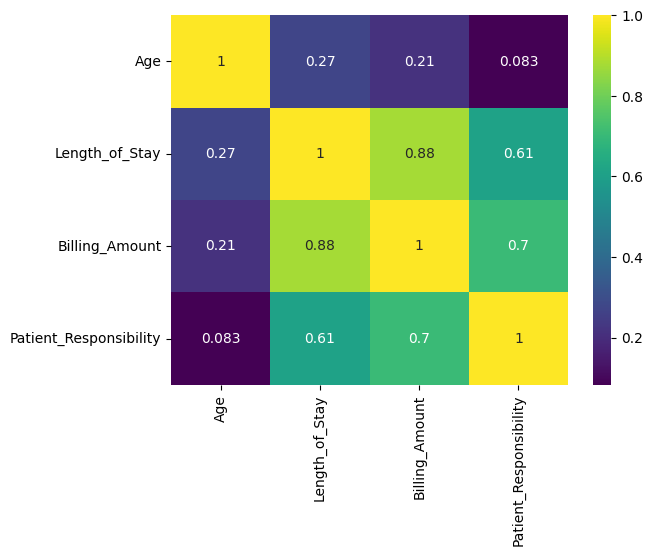

In [12]:
#Visualize the correlation between the numerical columns
sns.heatmap(correlations, annot=True, cmap='viridis')

INSIGHTS:

*   Significant correlations between the numerical variables.
*   Age of patient has minimal influence on billing amount compared to length of stay.
*   Length of stay has pronounce influence on the billing amount.




In [13]:
#Visualize distribution of the categorical columns
for columns in categoricals:
  fig = px.histogram(df, x= columns, text_auto = True, title= f'A visual presentation of the distribution of {columns} column')
  fig.update_layout(xaxis={'categoryorder':'total descending'})
  fig.show()

INSIGHTS:

*   Patients are uniformly distributed amongst the hospital.
*   Most preferred insurance provider is Medicare.
*   Majority of the cases reporting to the hospital were emergency cases.








In [14]:
#Create Age bins to categorize the different ages
df['Age_groups']= pd.cut(df['Age'], bins =[0,9,19,39,59,100], labels= ['Child', 'Youth', 'Young Adult', 'Middle Aged Adult','Elderly'])

In [15]:
# Freqency of visits by Age category
age_visit=df.groupby('Age_groups')['Patient_ID'].count().rename('patient_count').reset_index()
age_visit

/tmp/ipython-input-767348686.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Age_groups,patient_count
0,Child,0
1,Youth,441
2,Young Adult,4479
3,Middle Aged Adult,7782
4,Elderly,4349


In [16]:
#Visualize the frequency of visits by Age group
fig = px.histogram(age_visit, x='Age_groups', y= 'patient_count', text_auto=True, title='Frequency of visits by Age group')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()



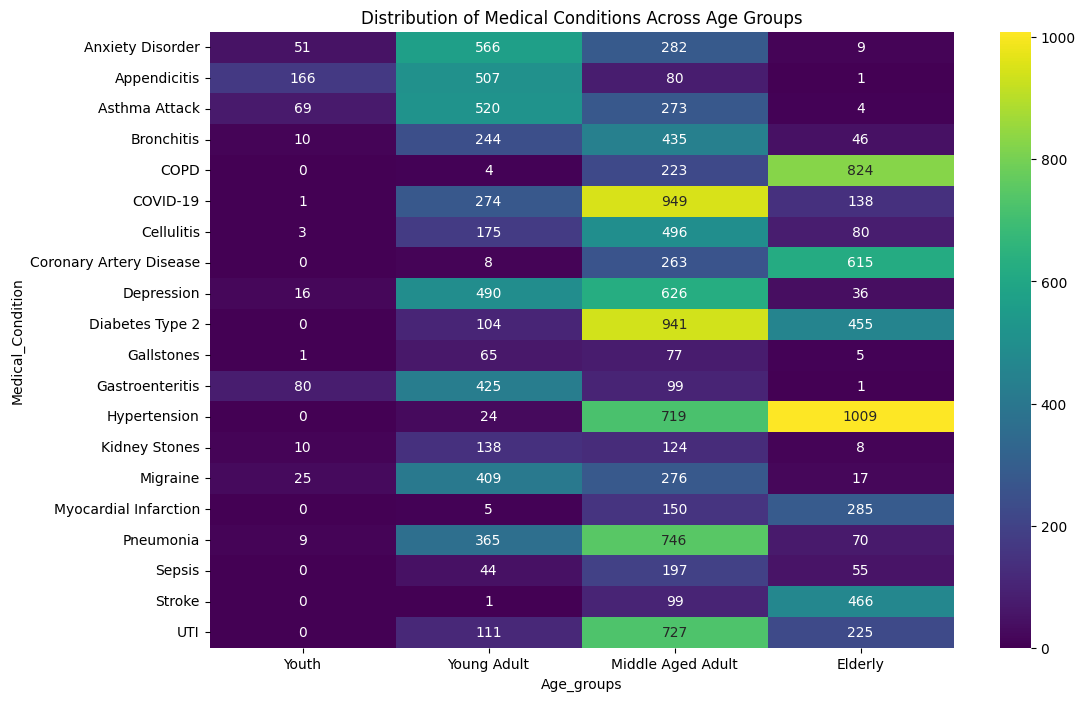

In [17]:
# Visualize distribution of medical condition in each age group
heatmap_condition_age = pd.crosstab(df['Medical_Condition'], df['Age_groups']) # This counts the number of patients for each Condition-Age_Group pair
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_condition_age, annot=True, fmt='d', cmap='viridis')
plt.title('Distribution of Medical Conditions Across Age Groups')
plt.xlabel('Age_groups')
plt.ylabel('Medical_Condition')
plt.show()





INSIGHT:

*   More middle aged people are visiting the hospital.
*   Diabetes Type 2, hypertension, COVID-19,Depression, Pneumonia, UTI feature prominently in Middle aged adults.
*   Hypertension, stroke, diabetes, coronary artery disease, COPD prominent amongst elderly.
*   Asthma, appendicitis, anxiety disorder, gastroenteritis prominent in the youth.
*   Asthma, migraine, depression, appendicitis,anxiety disorder,gastroenteritis prominent in young adults.







In [18]:
#are there patients that visited the hospital more than once withing this period
df.groupby('Patient_ID').count()

,Name,Age,Medical_Condition,Date_of_Admission,Discharge_Date,Length_of_Stay,Doctor,Hospital,Insurance,Admission_Type,Medication,Test_Result_Category,Test_Result_Description,Billing_Amount,Patient_Responsibility,Age_groups
Patient_ID,,,,,,,,,,,,,,,,
PAT100000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
PAT100001,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
PAT100004,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
PAT100005,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
PAT100006,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PAT129989,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
PAT129991,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
PAT129993,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Each patient ID is unique and all patients captured visited the hospital just once during this period.

In [19]:
#Effect of Age groups on billing amount
average_cost_age = round(df.groupby('Age_groups')['Billing_Amount'].mean().sort_values(ascending=False).rename('Average Cost($)').reset_index(),2)
average_cost_age

/tmp/ipython-input-413178002.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Age_groups,Average Cost($)
0,Elderly,57163.49
1,Middle Aged Adult,35873.71
2,Youth,23602.47
3,Young Adult,22462.75
4,Child,NaN


In [20]:
#visualize average cost of treatment by age groups
fig = px.bar(average_cost_age, x='Age_groups', y='Average Cost($)',text_auto=True, title='Average Cost by Age Group')
fig.show()

INSIGHTS:  

*   Elderly patients spent more on healthcare.

*   Healthcare expenditure increases with age.




In [21]:
#Effect of Medical conditions on average spend
average_cost_condition =round(df.groupby('Medical_Condition')['Billing_Amount'].mean().sort_values(ascending= False).rename('Average Cost($)').reset_index(),2)
average_cost_condition

,Medical_Condition,Average Cost($)
0,Sepsis,352003.94
1,Myocardial Infarction,187537.11
2,Stroke,155571.11
3,COVID-19,59738.10
4,Coronary Artery Disease,46542.25
5,Appendicitis,46013.67
6,COPD,44081.66
7,Pneumonia,43061.02
8,Gallstones,29959.94
9,Kidney Stones,20635.37


In [22]:
#Visualize the average cost per medical condition
fig =px.bar(average_cost_condition, x='Medical_Condition', y='Average Cost($)', text_auto =True, title ='Average Cost by Medical Condition')
fig.show()

INSIGHTS:

*   It cost more in treatment depending on the medical condition presented at the hospital.

*   Sepsis is the most expensive medical condition to treat.
*   Migraine is the least expensive medical condition to treat.







In [23]:
#Effect of length of stay(los) on billing amount
average_cost_los =round(df.groupby('Length_of_Stay')['Billing_Amount'].mean().rename('Average Cost($)').reset_index().sort_values(by= 'Length_of_Stay', ascending= False),2)
average_cost_los

,Length_of_Stay,Average Cost($)
29,30,449395.95
28,29,402442.90
27,28,473260.18
26,27,419970.57
25,26,418384.73
24,25,357697.21
23,24,336090.42
22,23,290921.94
21,22,283498.06
20,21,264615.41


In [24]:
#Visualize the average cost per length of stay
fig =px.line(average_cost_los, x='Length_of_Stay', y='Average Cost($)',  title ='Average Cost by Length of stay')
fig.show()

INSIGHT:

*   Average cost of treatment increases with increasing number of days spent at the hospital.




In [25]:
# Does been treated by a specific doctor for same conditions have an effect on how much it spent on treament?
average_cost_doctor_head = round(df.groupby(['Doctor','Medical_Condition'])['Billing_Amount'].mean().rename('Average Cost($)').sort_values(ascending = False).reset_index(). head(30),2)
average_cost_doctor_head

,Doctor,Medical_Condition,Average Cost($)
0,Dr. Everett,Sepsis,665326.32
1,Dr. Burgess,Sepsis,623606.58
2,Dr. Rosales,Sepsis,595182.82
3,Dr. Robinson,Sepsis,583248.04
4,Dr. Eaton,Sepsis,576463.60
5,Dr. Vasquez,Sepsis,575768.75
6,Dr. Melton,Sepsis,574900.51
7,Dr. Patrick,Sepsis,573302.98
8,Dr. Payne,Sepsis,572843.42
9,Dr. Beard,Sepsis,563989.97


In [26]:
average_cost_doctor_tail = round(df.groupby(['Doctor','Medical_Condition'])['Billing_Amount'].mean().rename('Average Cost($)').sort_values(ascending = False).reset_index().tail(30),2)
average_cost_doctor_tail

,Doctor,Medical_Condition,Average Cost($)
8420,Dr. Parks,Migraine,1203.68
8421,Dr. Moreno,Migraine,1181.89
8422,Dr. Stephens,Migraine,1181.34
8423,Dr. Schwartz,Migraine,1181.33
8424,Dr. Melendez,Migraine,1178.40
8425,Dr. Mccarthy,Gastroenteritis,1175.36
8426,Dr. Villa,Migraine,1165.96
8427,Dr. Peterson,Migraine,1165.67
8428,Dr. Kirk,Migraine,1154.76
8429,Dr. Sims,Migraine,1149.99


In [27]:
#Visualize how a doctor influences average cost for specific condtions top 30
fig = px.bar(average_cost_doctor_head, x='Doctor', y='Average Cost($)', color= 'Medical_Condition', text_auto=True, title='Average Cost by Doctor(top 30)')
fig.show()

In [28]:
#Visualize how a doctor influences average cost for specific condtions last 30
fig = px.bar(average_cost_doctor_tail, x='Doctor', y='Average Cost($)', color= 'Medical_Condition', text_auto=True, title='Average Cost by Doctor(last 30)')
fig.show()

INSIGHTS:

*   Choice of doctor influences how much is spent likely due to the different approaches each one may have in treatment or likely comorbidities.



In [29]:
#Effect of hospital on billing amount
average_cost_hospital = round(df.groupby('Hospital')['Billing_Amount'].mean().sort_values(ascending =False).rename('Average Cost($)').reset_index(),2)
average_cost_hospital

,Hospital,Average Cost($)
0,City General,45607.12
1,General Hospital,44482.64
2,Memorial Medical Center,40055.00
3,St. Mary's Hospital,37281.51
4,Community Hospital,30478.47
5,Regional Medical,27077.22


In [30]:
#Visualize how the choice of hospital affects the cost of treatment
fig =px.bar(average_cost_hospital, x='Hospital', y='Average Cost($)', text_auto=True, title='Average Cost by Hospital')
fig.show()



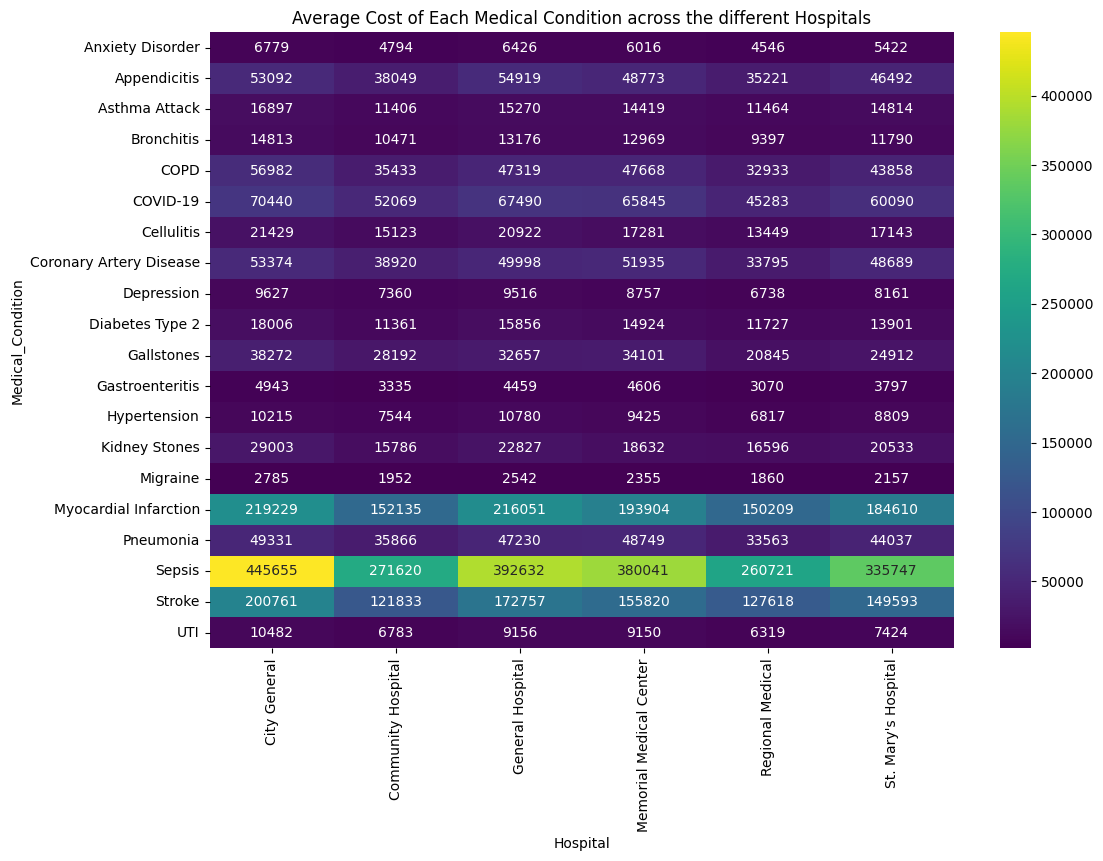

In [31]:
 #visualize the relationship between the hospitals, medical conditions and the billing amount
heatmap_hospital_condition = pd.pivot_table(df,values='Billing_Amount', index='Medical_Condition', columns='Hospital', aggfunc='mean') # This gives the average cost for each Hospital-Medical condition pair
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_hospital_condition, annot=True, fmt='.0f', cmap='viridis')
plt.title('Average Cost of Each Medical Condition across the different Hospitals')
plt.xlabel('Hospital')
plt.ylabel('Medical_Condition')
plt.show()



INSIGHTS:

*  It cost the most to get treatment from  City General hospital and the least to get treatment form  Regional Medical Hospital.



In [32]:
#Create a column "Insurance cover"
df['Insurance_cover']= df['Billing_Amount'] - df['Patient_Responsibility']

In [33]:
#Create a column "Percentage insurance cover"
df['Insurance_cover_percentage']= round((df['Insurance_cover']/df['Billing_Amount'])*100,1)

In [34]:
# average insurance cover
df.groupby('Insurance')['Insurance_cover_percentage'].mean().sort_values(ascending =False)

,Insurance_cover_percentage
Insurance,
Aetna,90.0
Blue Cross,90.0
UnitedHealthcare,90.0
Medicaid,80.0
Medicare,80.0
No Insurance,0.0


In [35]:
#number of patients on each insurance
insurance_numbers= df.groupby('Insurance')['Patient_ID'].count().sort_values(ascending =False).rename('Patient count').reset_index()
insurance_numbers

,Insurance,Patient count
0,Medicare,4697
1,Blue Cross,3118
2,Aetna,3116
3,UnitedHealthcare,2496
4,Medicaid,2116
5,No Insurance,1508


In [36]:
#Visualize the number of patients in each insurance
fig = px.bar(insurance_numbers, x='Insurance', y='Patient count', text_auto=True, title='Number of Patients on each Insurance')
fig.show()

In [37]:
#Effect of insurance on billing amount
average_cost_insurance = round(df.groupby('Insurance')['Insurance_cover'].mean().sort_values(ascending =False).rename('Average Cost($)').reset_index(),2)
average_cost_insurance

,Insurance,Average Cost($)
0,Medicaid,46388.88
1,Medicare,39057.90
2,Blue Cross,26035.51
3,UnitedHealthcare,25734.32
4,Aetna,25523.19
5,No Insurance,0.00


In [38]:
#Visualize how the choice of insurance provider affects the cost of treatment
fig =px.bar(average_cost_insurance, x='Insurance', y='Average Cost($)', text_auto=True, title='Average Cost by Insurance Provider')
fig.show()

INSIGHTS:

*  There is a significant number of people(2595) who do not have insurance and have to pay their total bills out of pocket.
*   Medicaid insurance pays the highest bills for patients.

*   Despite Medicare having an insurance cover of 80% it has the most patients on it.
*   Medicaid has an insurance cover of 80% ,pays the highest bills and has the least number of patients on it.





In [39]:
# Effect of Admission type on billing amount
average_cost_admission = round(df.groupby('Admission_Type')['Billing_Amount'].mean().sort_values(ascending =False).rename('Average Cost($)').reset_index(),2)
average_cost_admission

,Admission_Type,Average Cost($)
0,Emergency,41291.05
1,Urgent,34176.95
2,Elective,32801.29


In [40]:
#Visualize the effect of Admission type on average cost of treatment
fig =px.bar(average_cost_admission, x='Admission_Type', y='Average Cost($)', text_auto=True, title='Average Cost by Admission Type')
fig.show()

INSIGHTS:

*   Emergency admissions are more expensive than urgent and elective admissions. Cost decreases in same pecking order.





In [41]:
# Effect of Medication on billing amount
average_cost_medication = round(df.groupby('Medication')['Billing_Amount'].mean().sort_values(ascending =False).rename('Average Cost($)').reset_index(),2)
average_cost_medication

,Medication,Average Cost($)
0,Vancomycin,352003.94
1,Clopidogrel,187537.11
2,Aspirin,155571.11
3,Remdesivir,59738.10
4,Atorvastatin,46542.25
5,Cefoxitin,46013.67
6,Albuterol,44081.66
7,Azithromycin,43061.02
8,Ursodiol,29959.94
9,Ketorolac,20635.37


In [42]:
#Visualize effect of Medication on average cost of treatment
fig =px.bar(average_cost_medication, x='Medication', y='Average Cost($)', text_auto=True, title='Average Cost by Medication')
fig.show()

In [43]:
# Effect of Test results on billing amount
average_cost_test = round(df.groupby('Test_Result_Category')['Billing_Amount'].mean().sort_values(ascending =False).rename('Average Cost($)').reset_index(),2)
average_cost_test

,Test_Result_Category,Average Cost($)
0,Critical,113099.18
1,Abnormal,23234.14
2,Normal,8559.84


In [44]:
#Visualize effect of test results on average cost of treatment
fig =px.bar(average_cost_test, x='Test_Result_Category', y='Average Cost($)', text_auto=True, title='Average Cost by Test Results')
fig.show()

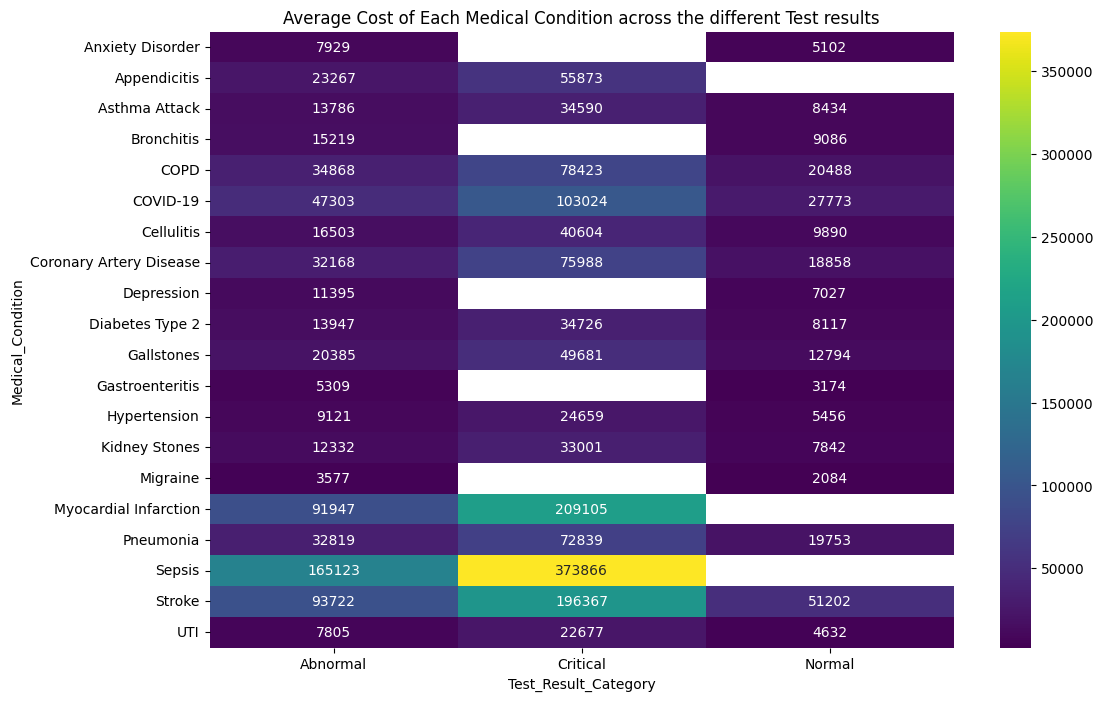

In [45]:
 # Relationship between medical condition, test results and billing amount
heatmap_tests_condition_cost = pd.pivot_table(df,values='Billing_Amount', index='Medical_Condition', columns='Test_Result_Category', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_tests_condition_cost, annot=True, fmt='.0f', cmap='viridis') # Visualize the relationship between tests results and average cost across different medical conditions
plt.title('Average Cost of Each Medical Condition across the different Test results')
plt.xlabel('Test_Result_Category')
plt.ylabel('Medical_Condition')
plt.show()

INSIGHTS:


*   It is expensive to treat critical conditions.

*   Critical test results predominatly consists of conditions that are expensive to treat so we observe the high average cost.
*   It is followed by Abnormal and the normal test results.



In [46]:
#Effect of age on test results
age_group_test= df.groupby('Age_groups')['Test_Result_Category'].value_counts().rename('Test_Result_count'). reset_index()
age_group_test

/tmp/ipython-input-3547562668.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Age_groups,Test_Result_Category,Test_Result_count
0,Child,Abnormal,0
1,Child,Critical,0
2,Child,Normal,0
3,Youth,Normal,158
4,Youth,Abnormal,147
5,Youth,Critical,136
6,Young Adult,Normal,2018
7,Young Adult,Abnormal,1715
8,Young Adult,Critical,746
9,Middle Aged Adult,Abnormal,3633


In [47]:
#Visualize the influence of age on the test results
fig =px.bar(age_group_test, x='Age_groups', y='Test_Result_count', color='Test_Result_Category', text_auto=True, title='Influnce of Age on Test Results')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

#Visuals of the influence of age on test results expressed as a percentage
fig.update_layout(xaxis={'categoryorder':'total descending'}, barnorm='percent', title ='Influence of Age on Test Results (percentage)')
fig.update_yaxes(title_text="Percent", tickformat= '.1f')
fig.show()

INSIGHT:

*   Young adults have the highest proportion of it's group having normal results.
*   Youth has the highest proportion of it's group having critical results.
*   Middle age has the highest proportion having abnormal results.





In [48]:
#Effect of medical condition on test results
condition_test = df.groupby('Medical_Condition')['Test_Result_Category'].value_counts().rename('Test_Result_count').reset_index()
condition_test

,Medical_Condition,Test_Result_Category,Test_Result_count
0,Anxiety Disorder,Normal,732
1,Anxiety Disorder,Abnormal,176
2,Appendicitis,Critical,526
3,Appendicitis,Abnormal,228
4,Asthma Attack,Abnormal,429
5,Asthma Attack,Normal,345
6,Asthma Attack,Critical,92
7,Bronchitis,Normal,383
8,Bronchitis,Abnormal,352
9,COPD,Abnormal,548


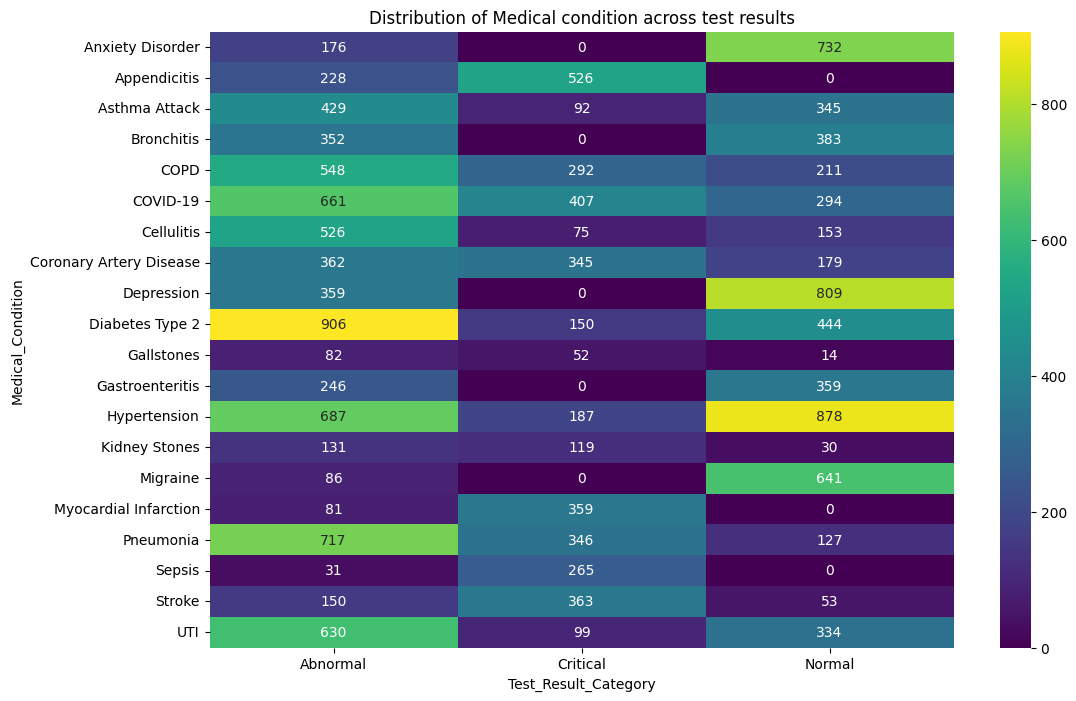

In [49]:
 #visualize the relationship between medical condition on test results
heatmap_tests_condition_result = pd.crosstab(df['Medical_Condition'], df['Test_Result_Category']) # This gives the count of patients for each Test result-Medical condition pair
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_tests_condition_result, annot=True, fmt='d', cmap='viridis') # Visualize the relationship between tests results and different medical conditions
plt.title('Distribution of Medical condition across test results')
plt.xlabel('Test_Result_Category')
plt.ylabel('Medical_Condition')
plt.show()

INSIGHT:

*   Abnormal results dominate across most conditions, particularly for chronic and infectious diseases such as Diabetes Type 2, Hypertension, Pneumonia, COVID-19, and UTI.
*   Critical results are concentrated in acute, life-threatening conditions, including Appendicitis, Myocardial Infarction, Stroke, Sepsis, and Pneumonia.


In [50]:
#Effect of length of stay (los) on test results
los_test = df.groupby('Length_of_Stay')['Test_Result_Category'].value_counts().rename('Test_Result_count').reset_index()
los_test

,Length_of_Stay,Test_Result_Category,Test_Result_count
0,1,Normal,632
1,1,Abnormal,135
2,1,Critical,10
3,2,Normal,1321
4,2,Abnormal,590
...,...,...,...
65,27,Abnormal,1
66,28,Critical,12
67,29,Critical,11
68,29,Abnormal,1


In [51]:
# visualize the progression of condition relative to length of stay
fig= px.line(los_test, x='Length_of_Stay', y= 'Test_Result_count' , color='Test_Result_Category', title='Test Results by Length of Stay')
fig.show()

INSIGHTS:

* Normal test results are associated with shorter hospital stays, peaking around 2 - 4 days, and decline sharply thereafter. This suggests quicker diagnosis, treatment, and discharge.


* Abnormal results peak slightly later (around 4-6 days) and show a longer tail, indicating moderate severity and requiring extended monitoring or treatment.


* Critical test results are strongly associated with prolonged length of stay, with extended distribution that persists beyond 10 - 20 days, reflecting higher severity.




In [52]:
#Effect of hospital on test results
hospital_test = df.groupby('Hospital')['Test_Result_Category'].value_counts().rename('Test_Result_count').reset_index()
hospital_test

,Hospital,Test_Result_Category,Test_Result_count
0,City General,Abnormal,1173
1,City General,Normal,1017
2,City General,Critical,617
3,Community Hospital,Abnormal,1284
4,Community Hospital,Normal,988
5,Community Hospital,Critical,602
6,General Hospital,Abnormal,1263
7,General Hospital,Normal,989
8,General Hospital,Critical,621
9,Memorial Medical Center,Abnormal,1189


In [53]:
#visualize the hospital on test results
fig= px.bar(hospital_test, x='Hospital', y= 'Test_Result_count' , color='Test_Result_Category', text_auto=True, title='Test Results by hospital')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


# Visualize the effect of hospital on test results as percentages
fig.update_layout(xaxis={'categoryorder':'total descending'}, barnorm='percent', title ='Test Results by Hospital (Percentages)')
fig.update_yaxes(title_text="Percent", tickformat= '.1f')
fig.show()


INSIGHTS:

*   There is an almost uniform distribution of test results across the different hospitals, indicative of similar healthcare standards or protocols in all the facilities.



In [54]:
#Relationship between insurance and test results
Insurance_test = df.groupby('Insurance')['Test_Result_Category'].value_counts().rename('Test_Result_count').reset_index()
Insurance_test

,Insurance,Test_Result_Category,Test_Result_count
0,Aetna,Abnormal,1470
1,Aetna,Normal,1219
2,Aetna,Critical,427
3,Blue Cross,Abnormal,1483
4,Blue Cross,Normal,1195
5,Blue Cross,Critical,440
6,Medicaid,Critical,1027
7,Medicaid,Abnormal,574
8,Medicaid,Normal,515
9,Medicare,Abnormal,2078


In [55]:
#visualize the relationship between insurance and test results
fig= px.bar(Insurance_test, x='Insurance', y= 'Test_Result_count' , color='Test_Result_Category', text_auto=True, title='Test Results by insurance')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


# Visualize the relationship between insurance and test results as percentages
fig.update_layout(xaxis={'categoryorder':'total descending'}, barnorm='percent', title ='Test Results by Insurance (Percentages)')
fig.update_yaxes(title_text="Percent", tickformat= '.1f')
fig.show()


INSIGHTS:

* Medicaid patients show the highest proportion of critical test results (47.9%)
* Medicare patients have a more balanced distribution, with substantial.abnormal (44.1%) and normal (31.2%) results, and a moderate critical share (~24.7%).

* Uninsured patients show elevated normal and abnormal proportions, which may indicate delayed presentation until conditions worsen.






In [56]:
#Effect of type of admission on test results
admission_test = df.groupby('Admission_Type')['Test_Result_Category'].value_counts().rename('Test_Result_count').reset_index()
admission_test

,Admission_Type,Test_Result_Category,Test_Result_count
0,Elective,Abnormal,1491
1,Elective,Normal,1183
2,Elective,Critical,748
3,Emergency,Abnormal,3659
4,Emergency,Normal,3023
5,Emergency,Critical,1854
6,Urgent,Abnormal,2238
7,Urgent,Normal,1780
8,Urgent,Critical,1075


In [57]:
#visualize the effect of type of admission  on test results
fig= px.bar(admission_test, x='Admission_Type', y= 'Test_Result_count' , color='Test_Result_Category', text_auto=True, title='Test Results by admission type')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


# Visualize the effect of type of admission on test results as percentages
fig.update_layout(xaxis={'categoryorder':'total descending'}, barnorm='percent', title ='Test Results by admission type (Percentages)')
fig.update_yaxes(title_text="Percent", tickformat= '.1f')
fig.show()


INSIGHT:
*   Type of admission does not influence the test results. Healthcare provision is standardized.




In [58]:
#Effect of type of medication on test results
medication_test = df.groupby('Medication')['Test_Result_Category'].value_counts().rename('Test_Result_count').reset_index()
medication_test

,Medication,Test_Result_Category,Test_Result_count
0,Albuterol,Abnormal,548
1,Albuterol,Critical,292
2,Albuterol,Normal,211
3,Alprazolam,Normal,732
4,Alprazolam,Abnormal,176
5,Aspirin,Critical,363
6,Aspirin,Abnormal,150
7,Aspirin,Normal,53
8,Atorvastatin,Abnormal,362
9,Atorvastatin,Critical,345


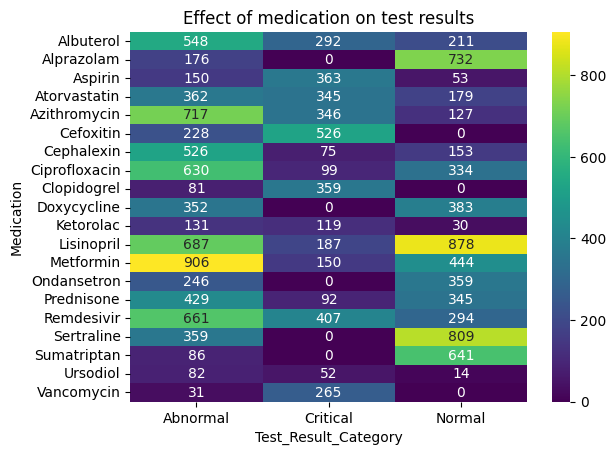

In [59]:
 # Visualize the relationship between tests results and medication
heatmap_tests_medication = pd.crosstab(df['Medication'], df['Test_Result_Category'])
sns.heatmap(heatmap_tests_medication, annot=True, fmt='d', cmap='viridis')
plt.title('Effect of medication on test results')
plt.xlabel('Test_Result_Category')
plt.ylabel('Medication')
plt.show()

In [60]:
#Medical condition vrs admission type
condition_admission = df.groupby('Medical_Condition')['Admission_Type'].value_counts().rename('Patient_count').reset_index()
condition_admission

,Medical_Condition,Admission_Type,Patient_count
0,Anxiety Disorder,Emergency,431
1,Anxiety Disorder,Urgent,304
2,Anxiety Disorder,Elective,173
3,Appendicitis,Emergency,387
4,Appendicitis,Urgent,223
5,Appendicitis,Elective,144
6,Asthma Attack,Emergency,403
7,Asthma Attack,Urgent,265
8,Asthma Attack,Elective,198
9,Bronchitis,Emergency,369


In [61]:
#visualize medical conditions and the type of admissions
fig= px.bar(condition_admission, x='Medical_Condition', y= 'Patient_count' , color='Admission_Type', text_auto=True, title='Medical condition against admission type')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

# Visualize medical conditions and the type of admissions as percentages
fig.update_layout(xaxis={'categoryorder':'total descending'}, barnorm='percent', title ='Medical condition against admission type (Percentages)')
fig.update_yaxes(title_text="Percent", tickformat= '.1f')
fig.show()


INSIGHTS:

*  Chronic disease medications such as Metformin, Lisinopril, and Atorvastatin are associated with high volumes of abnormal and normal results.


*  Antibiotics and antivirals (e.g., Azithromycin, Ciprofloxacin, Vancomycin, Remdesivir) show higher proportions of critical and abnormal results, consistent with their use in acute and severe infections.





**RESEARCH QUESTIONS ANSWERED**

---





1.   Does medical conditions affect billing amount?

   

*   *Yes it does, billing amount varied with different medical conditions*


2.   Does healthcare facilty influence billing amount?


*  *Yes it does. Across different hospitals but medical condition remaining the same, the billing varied with some hospitals having almost a 69% increase in billing amount*


3.   Does type of admission affect billing amount?


*   *Yes it does. Protocols differ for the different type of admissions and this determines how much is paid*


4.   Which demographic group incur higher medical expense?


*   *Elderly patients i.e. those who are 60 years and above have a higher medical expenditure*


5.   What recommendations can be made to reduce treatment cost?


*   *Visit a hospital at the onset of any condition, do not wait till it's an emergency. Delay may increase your expenses*
*   *Choose a hospital that best fits your financial strength e.g Regional Hospital charges the least compared to City General hospital*

*   *Subscribe to a health insurance*
*   *Be health conscious(exercise, eat well, rest properly, etc)*


6.   Does medical condition, medication, age, length of hospital stay influence test results?


*   *The kind of medical condition presented does not influence test results*
*   *Age has an influence on test results as younger people generally may recover faster compared to older people*


*   *The test result may influence how a patient stays in the hospital*


7.   Are certain medical conditions  more prone to poor test outcomes?
  

*   *Yes there is. Risk groups that have a significant portion of patients having either abnormal or critical results are Sepsis,   Myocardial Infarction, Appendicitis, Stroke, Kidney stones, Coronary Artery Disease*














**RECOMMENDATION**


* Preventive care focus: The middle aged, young adult and elderly represent demographic groups with the highest number of hospital visits. A targeted public health campaigned focused on this group may help promote healthier lifestyles  
* Comprehensive health insurance education guide for the uninsured



**CONCLUSION**

* Sepsis, Myocardial infarction and stroke are the most expensive conditions with sepsis averaging billing amount of approximately 358000 per case. Implementation of early warning sign systems will catch the conditions early and help reduce cost and improve patient outcome

* Significant variance in treatment costs exists, with City General charging 69% more for Sepsis than Regional Medical. Investigate the drivers behind the 69% price gap—whether due to higher complication rates, longer lengths of stay, or administrative overhead.

* High volume cases are being treated via emergency admissions, that is about 50% of cases. This is indicative of poor primary care management leading to preventable high cost emergency visits. Transition from a reactive "Emergency-first" model to a proactive "Primary care-first" model.


* Patients with no insurance are paying for all their bills out-of-pocket. Proactively identify uninsured patients upon admission and educate and guide them on the need for a health insurance








